# IBMi Jupyter Examples

Some examples of calling IBMi in Jupyter Notebooks

In [95]:
# Run this to initialize IBMi notebook
%run ../IBMi.ipynb

Enter host: DEV400
Enter user: OTTEB
Enter password: ········
Connecting to DEV400 as OTTEB ...
Successfully connected!


## List QSYS Tables

In [113]:
%%ibmi

select TABLE_SCHEMA || '/' || TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 10;

Executing statement 1 of 1 ...
    Fetched 10 row(s) in 0.238 second(s)


,TABLE_NAME,TABLE_TEXT
0,QSYS/FMWINFO,Output file for DSPFMWSTS
1,QSYS/QAANZLOG,Output file for PRTERRLOG *ANZLOG
2,QSYS/QABNDBND,System supplied outfile for DSPBNDDIR command.
3,QSYS/QABNDMBA,System supplied outfile for DSPMOD command.
4,QSYS/QABNDMCO,System supplied outfile for DSPMOD command.
5,QSYS/QABNDMEX,System supplied outfile for DSPMOD command.
6,QSYS/QABNDMIM,System supplied outfile for DSPMOD command.
7,QSYS/QABNDMPR,System supplied outfile for DSPMOD command.
8,QSYS/QABNDMRE,System supplied outfile for DSPMOD command.
9,QSYS/QABNDMSI,System supplied outfile for DSPMOD command.


## List Members in a Source Physical File

In [97]:
%%ibmi

select TABLE_SCHEMA, TABLE_NAME, TABLE_PARTITION, SOURCE_TYPE
from QSYS2.SYSPARTITIONSTAT
where TABLE_SCHEMA='BOLIB'
  and TABLE_NAME='QRPGLESRC'
order by TABLE_PARTITION
limit 10;

Executing statement 1 of 1 ...
    Fetched 10 row(s) in 0.353 second(s)


,TABLE_SCHEMA,TABLE_NAME,TABLE_PARTITION,SOURCE_TYPE
0,BOLIB,QRPGLESRC,BTCHASH,RPGLE
1,BOLIB,QRPGLESRC,CLR019B,SQLRPGLE
2,BOLIB,QRPGLESRC,EXCHAIN,RPGLE
3,BOLIB,QRPGLESRC,FIXEDR2,RPGLE
4,BOLIB,QRPGLESRC,FIXEDTEST,RPGLE
5,BOLIB,QRPGLESRC,FIZZBUZZ,RPGLE
6,BOLIB,QRPGLESRC,HELLOQSH,RPGLE
7,BOLIB,QRPGLESRC,HXCVT,RPGLE
8,BOLIB,QRPGLESRC,OV10MILL01,SQLRPGLE
9,BOLIB,QRPGLESRC,OV10MILL2,RPGLE


## View an RPGLE Source Member

In [98]:
%%ibmi 
create or replace alias QTEMP.TMPSRC1 for BOLIB.QRPGLESRC(FIZZBUZZ);

select SRCDAT, SRCDTA from QTEMP.TMPSRC1;

drop alias QTEMP.TMPSRC1;

Executing statement 1 of 3 ...
    Statement executed successfully.
    0 row(s) affected by statement.
Executing statement 2 of 3 ...
    Fetched 16 row(s) in 0.208 second(s)


,SRCDAT,SRCDTA
0,190402,/free
1,190402,// The classic fizzbuzz program in RPGLE Free
2,190402,dcl-s num int(10);
3,190402,
4,190402,for num = 1 to 100;
5,190403,if %REM(num:3) = 0 and %REM(num:5) = 0;
6,190402,dsply ('num - ' + %char(num) + ' FIZZBUZZ');
7,190402,elseif %rem(num:3) = 0;
8,190402,dsply ('num - ' + %char(num) + ' FIZZ');
9,190402,elseif %rem(num:5) = 0;


Executing statement 3 of 3 ...
    Statement executed successfully.
    0 row(s) affected by statement.


## Calling an API with DB2

In [100]:
%%ibmi

select id, username, url, (minutes / 60) as hours_watched
from json_table(
    Systools.HttpPostClob(
        'https://graphql.anilist.co',
        cast('<httpHeader><header name="Content-Type" value="application/json"/></httpHeader>' as clob),
        cast('{"query": "{User(search:\"barrettotte\"){id name siteUrl stats{watchedTime}}}"}' as clob)
    ),
    '$.data.User'
    columns(
        id       char(10) path '$.id',
        username char(20) path '$.name',
        url      char(32) path '$.siteUrl',
        minutes  char(10) path '$.stats.watchedTime'
    )
);

Executing statement 1 of 1 ...
    Fetched 1 row(s) in 1.974 second(s)


,ID,USERNAME,URL,HOURS_WATCHED
0,247578,barrettotte,https://anilist.co/user/247578,1639


## Testing Output Formats

Dataframes make it super easy to output to whatever format, let's test it out

In [101]:
%%ibmi

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 0.497 second(s)


,TABLE_SCHEMA,TABLE_NAME,TABLE_TEXT
0,QSYS,FMWINFO,Output file for DSPFMWSTS
1,QSYS,QAANZLOG,Output file for PRTERRLOG *ANZLOG
2,QSYS,QABNDBND,System supplied outfile for DSPBNDDIR command.
3,QSYS,QABNDMBA,System supplied outfile for DSPMOD command.
4,QSYS,QABNDMCO,System supplied outfile for DSPMOD command.


In [102]:
%%ibmi -json

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 0.916 second(s)


'[{"TABLE_SCHEMA":"QSYS","TABLE_NAME":"FMWINFO","TABLE_TEXT":"Output file for DSPFMWSTS"},{"TABLE_SCHEMA":"QSYS","TABLE_NAME":"QAANZLOG","TABLE_TEXT":"Output file for PRTERRLOG *ANZLOG"},{"TABLE_SCHEMA":"QSYS","TABLE_NAME":"QABNDBND","TABLE_TEXT":"System supplied outfile for DSPBNDDIR command."},{"TABLE_SCHEMA":"QSYS","TABLE_NAME":"QABNDMBA","TABLE_TEXT":"System supplied outfile for DSPMOD command."},{"TABLE_SCHEMA":"QSYS","TABLE_NAME":"QABNDMCO","TABLE_TEXT":"System supplied outfile for DSPMOD command."}]'

In [103]:
%%ibmi -csv

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 0.437 second(s)


'TABLE_SCHEMA,TABLE_NAME,TABLE_TEXT\r\nQSYS,FMWINFO,Output file for DSPFMWSTS\r\nQSYS,QAANZLOG,Output file for PRTERRLOG *ANZLOG\r\nQSYS,QABNDBND,System supplied outfile for DSPBNDDIR command.\r\nQSYS,QABNDMBA,System supplied outfile for DSPMOD command.\r\nQSYS,QABNDMCO,System supplied outfile for DSPMOD command.\r\n'

In [104]:
%%ibmi -html

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 1.644 second(s)


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>TABLE_SCHEMA</th>\n      <th>TABLE_NAME</th>\n      <th>TABLE_TEXT</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>QSYS</td>\n      <td>FMWINFO</td>\n      <td>Output file for DSPFMWSTS</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>QSYS</td>\n      <td>QAANZLOG</td>\n      <td>Output file for PRTERRLOG *ANZLOG</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>QSYS</td>\n      <td>QABNDBND</td>\n      <td>System supplied outfile for DSPBNDDIR command.</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>QSYS</td>\n      <td>QABNDMBA</td>\n      <td>System supplied outfile for DSPMOD command.</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>QSYS</td>\n      <td>QABNDMCO</td>\n      <td>System supplied outfile for DSPMOD command.</td>\n    </tr>\n  </tbody>\n</table>'

In [105]:
%%ibmi -tex

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 0.34 second(s)


'\\begin{tabular}{lll}\n\\toprule\nTABLE\\_SCHEMA & TABLE\\_NAME &                                      TABLE\\_TEXT \\\\\n\\midrule\n        QSYS &    FMWINFO &                       Output file for DSPFMWSTS \\\\\n        QSYS &   QAANZLOG &               Output file for PRTERRLOG *ANZLOG \\\\\n        QSYS &   QABNDBND &  System supplied outfile for DSPBNDDIR command. \\\\\n        QSYS &   QABNDMBA &     System supplied outfile for DSPMOD command. \\\\\n        QSYS &   QABNDMCO &     System supplied outfile for DSPMOD command. \\\\\n\\bottomrule\n\\end{tabular}\n'

In [106]:
%%ibmi -str

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 0.741 second(s)


'TABLE_SCHEMA TABLE_NAME                                      TABLE_TEXT\n        QSYS    FMWINFO                       Output file for DSPFMWSTS\n        QSYS   QAANZLOG               Output file for PRTERRLOG *ANZLOG\n        QSYS   QABNDBND  System supplied outfile for DSPBNDDIR command.\n        QSYS   QABNDMBA     System supplied outfile for DSPMOD command.\n        QSYS   QABNDMCO     System supplied outfile for DSPMOD command.'

In [107]:
%%ibmi -xml

select TABLE_SCHEMA, TABLE_NAME as TABLE_NAME, TABLE_TEXT
from QSYS2.SYSTABLES
where TABLE_SCHEMA='QSYS'
limit 5;

Executing statement 1 of 1 ...
    Fetched 5 row(s) in 0.459 second(s)


'<rows><row><col name="TABLE_SCHEMA">QSYS</col><col name="TABLE_NAME">FMWINFO</col><col name="TABLE_TEXT">Output file for DSPFMWSTS</col></row><row><col name="TABLE_SCHEMA">QSYS</col><col name="TABLE_NAME">QAANZLOG</col><col name="TABLE_TEXT">Output file for PRTERRLOG *ANZLOG</col></row><row><col name="TABLE_SCHEMA">QSYS</col><col name="TABLE_NAME">QABNDBND</col><col name="TABLE_TEXT">System supplied outfile for DSPBNDDIR command.</col></row><row><col name="TABLE_SCHEMA">QSYS</col><col name="TABLE_NAME">QABNDMBA</col><col name="TABLE_TEXT">System supplied outfile for DSPMOD command.</col></row><row><col name="TABLE_SCHEMA">QSYS</col><col name="TABLE_NAME">QABNDMCO</col><col name="TABLE_TEXT">System supplied outfile for DSPMOD command.</col></row></rows>'

## Testing Graphs

Executing statement 1 of 1 ...
    Fetched 11 row(s) in 1.131 second(s)


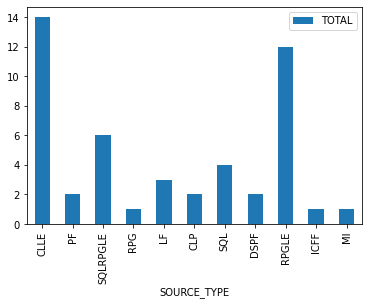

In [108]:
%%ibmi -plotbar

select SOURCE_TYPE, count(SOURCE_TYPE) as TOTAL
from QSYS2.SYSPARTITIONSTAT
where TABLE_SCHEMA='BOLIB'
    and SOURCE_TYPE is not null
group by SOURCE_TYPE;

Executing statement 1 of 1 ...
    Fetched 11 row(s) in 0.76 second(s)


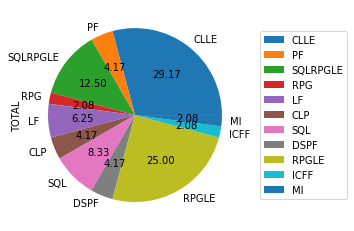

In [109]:
%%ibmi -plotpie

select SOURCE_TYPE, count(SOURCE_TYPE) as TOTAL
from QSYS2.SYSPARTITIONSTAT
where TABLE_SCHEMA='BOLIB'
    and SOURCE_TYPE is not null
group by SOURCE_TYPE;

Executing statement 1 of 1 ...
    Fetched 11 row(s) in 0.907 second(s)


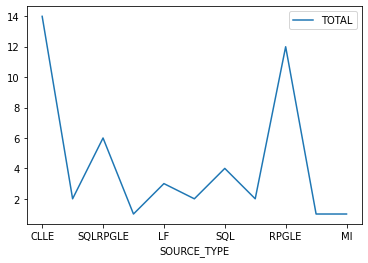

In [110]:
%%ibmi -plotline

select SOURCE_TYPE, count(SOURCE_TYPE) as TOTAL
from QSYS2.SYSPARTITIONSTAT
where TABLE_SCHEMA='BOLIB'
    and SOURCE_TYPE is not null
group by SOURCE_TYPE;